In [34]:
!pip install pandas seaborn matplotlib sklearn

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [ ]:
# Load the dataset
data = pd.read_csv("cancer_patient_data_sets.csv")

In [ ]:
# Preprocess the data
# need to handle missing values, convert categorical variables to numerical format.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
data = data.drop("Patient Id", axis=1)
data.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [ ]:
# Encode categorical variables
le = LabelEncoder()
data_copy = data.copy()
data_copy['Level'] = le.fit_transform(data['Level'])

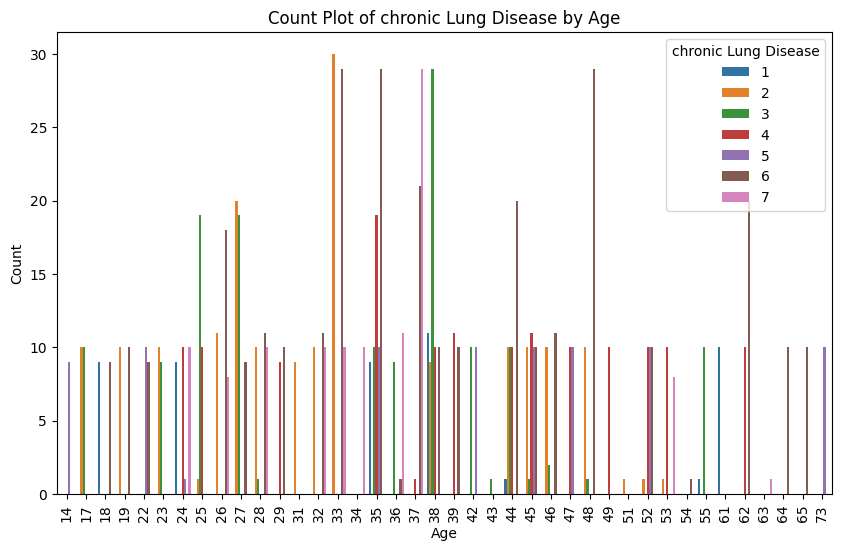

In [ ]:
column = data['Age']
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=column, hue='chronic Lung Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title(f'Count Plot of chronic Lung Disease by Age')
plt.legend(title='chronic Lung Disease', loc='upper right')
plt.xticks(rotation=90)
plt.show()

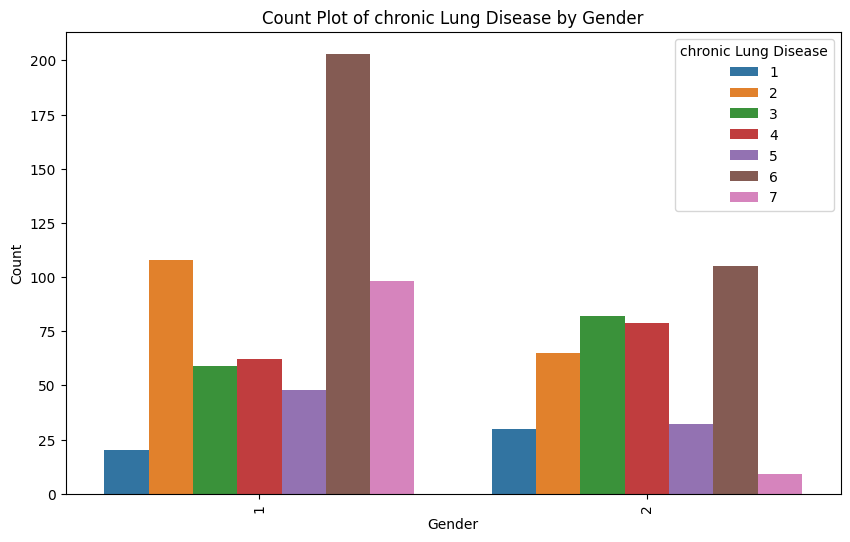

In [ ]:
column = data['Gender']
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=column, hue='chronic Lung Disease')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title(f'Count Plot of chronic Lung Disease by Gender')
plt.legend(title='chronic Lung Disease', loc='upper right')
plt.xticks(rotation=90)
plt.show()

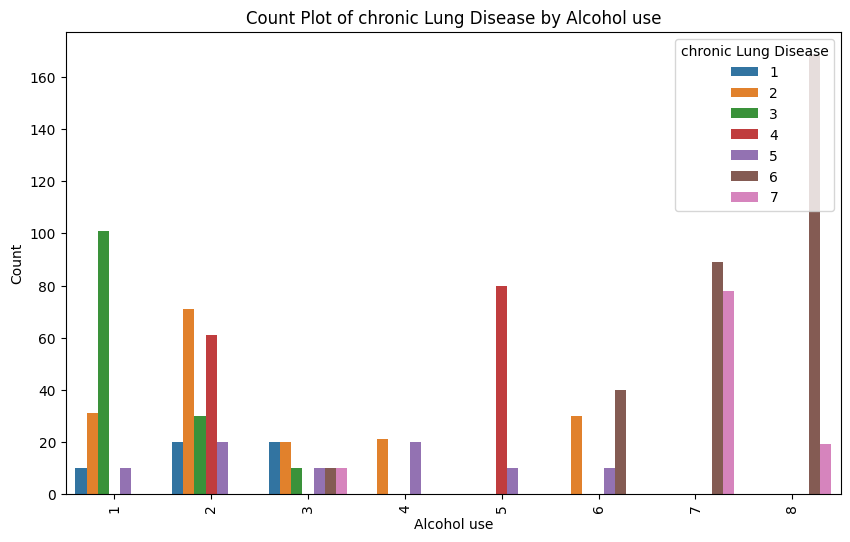

In [ ]:
column = data['Alcohol use']
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=column, hue='chronic Lung Disease')
plt.xlabel('Alcohol use')
plt.ylabel('Count')
plt.title(f'Count Plot of chronic Lung Disease by Alcohol use')
plt.legend(title='chronic Lung Disease', loc='upper right')
plt.xticks(rotation=90)
plt.show()

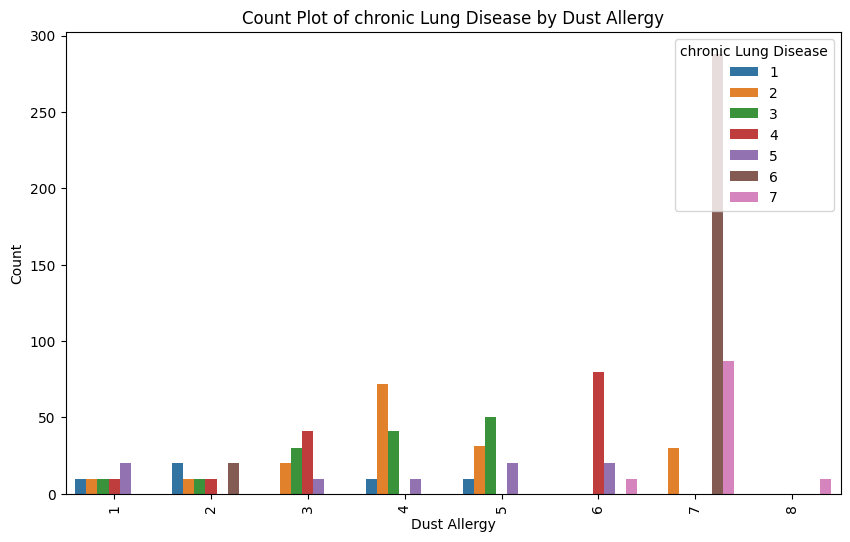

In [ ]:
column = data['Dust Allergy']
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=column, hue='chronic Lung Disease')
plt.xlabel('Dust Allergy')
plt.ylabel('Count')
plt.title(f'Count Plot of chronic Lung Disease by Dust Allergy')
plt.legend(title='chronic Lung Disease', loc='upper right')
plt.xticks(rotation=90)
plt.show()

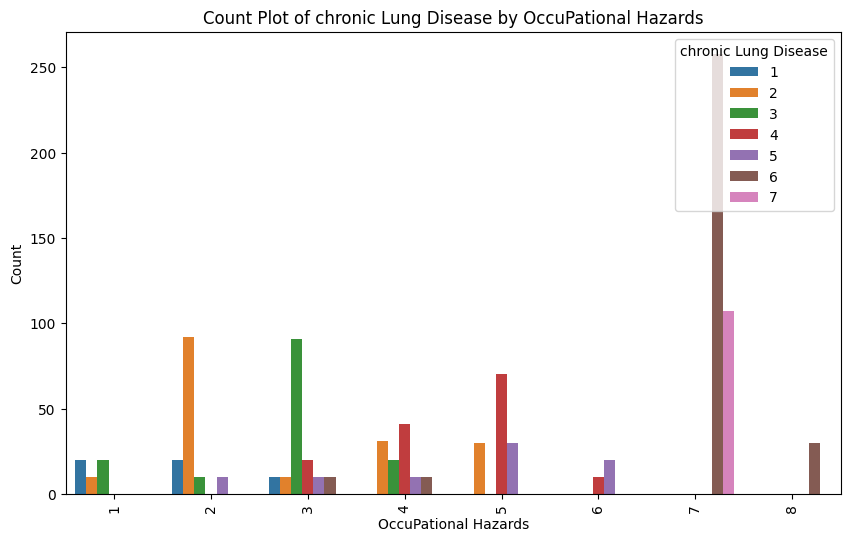

In [ ]:
column = data['OccuPational Hazards']
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=column, hue='chronic Lung Disease')
plt.xlabel('OccuPational Hazards')
plt.ylabel('Count')
plt.title(f'Count Plot of chronic Lung Disease by OccuPational Hazards')
plt.legend(title='chronic Lung Disease', loc='upper right')
plt.xticks(rotation=90)
plt.show()

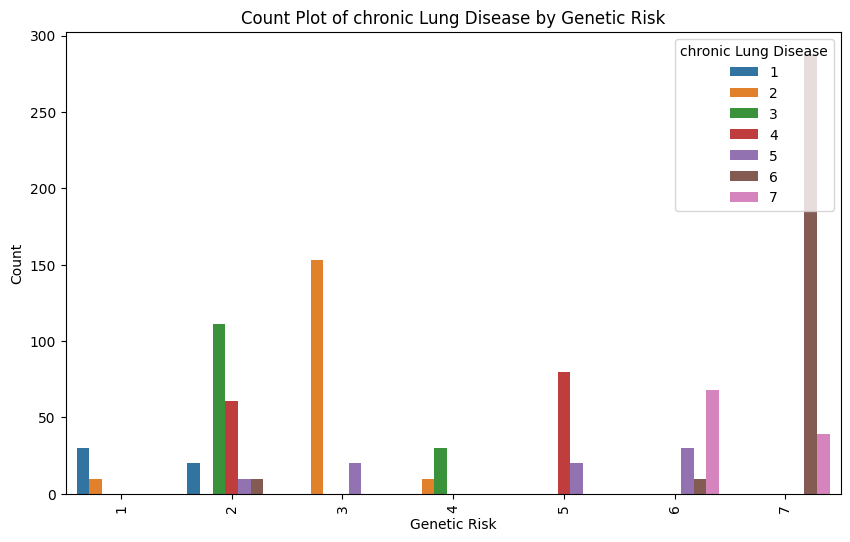

In [ ]:
column = data['Genetic Risk']
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=column, hue='chronic Lung Disease')
plt.xlabel('Genetic Risk')
plt.ylabel('Count')
plt.title(f'Count Plot of chronic Lung Disease by Genetic Risk')
plt.legend(title='chronic Lung Disease', loc='upper right')
plt.xticks(rotation=90)
plt.show()

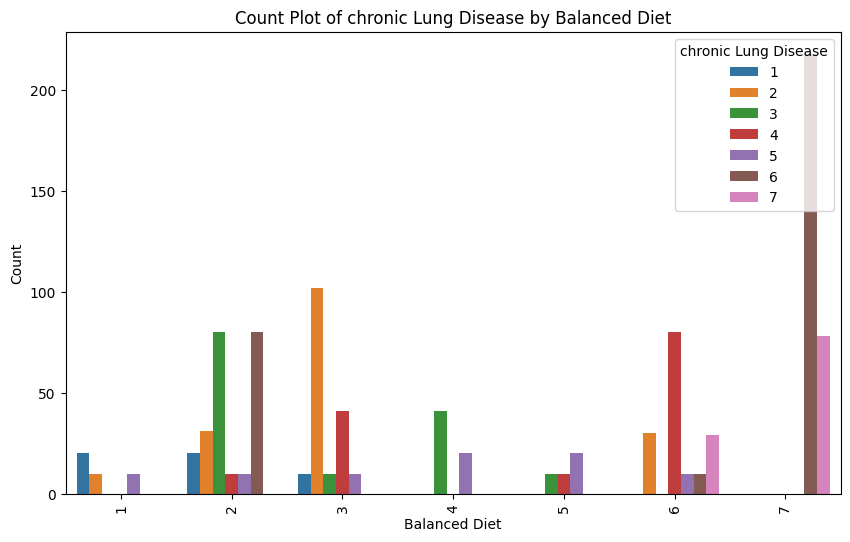

In [ ]:
column = data['Balanced Diet']
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=column, hue='chronic Lung Disease')
plt.xlabel('Balanced Diet')
plt.ylabel('Count')
plt.title(f'Count Plot of chronic Lung Disease by Balanced Diet')
plt.legend(title='chronic Lung Disease', loc='upper right')
plt.xticks(rotation=90)
plt.show()

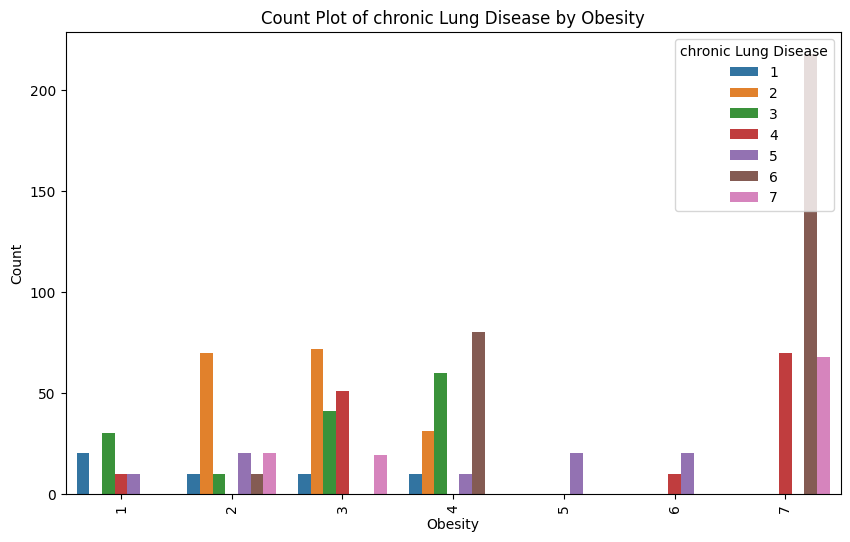

In [ ]:
column = data['Obesity']
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=column, hue='chronic Lung Disease')
plt.xlabel('Obesity')
plt.ylabel('Count')
plt.title(f'Count Plot of chronic Lung Disease by Obesity')
plt.legend(title='chronic Lung Disease', loc='upper right')
plt.xticks(rotation=90)
plt.show()

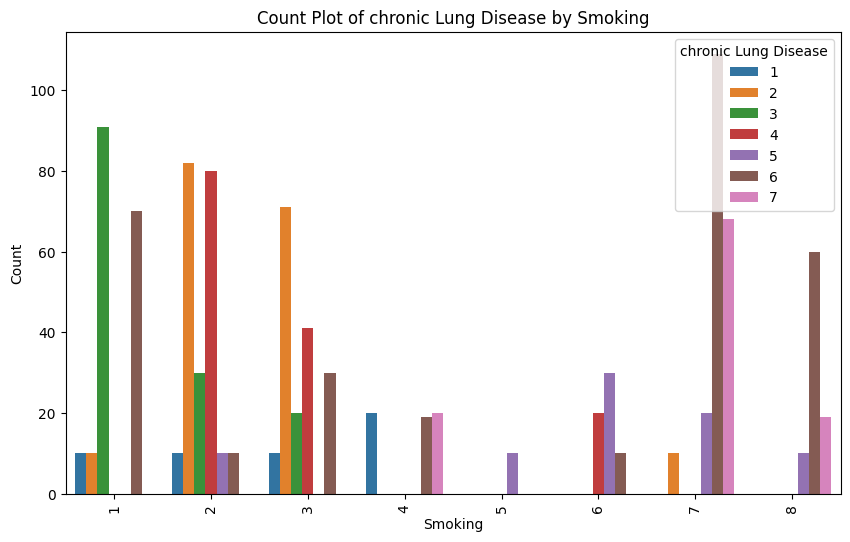

In [ ]:
column = data['Smoking']
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=column, hue='chronic Lung Disease')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title(f'Count Plot of chronic Lung Disease by Smoking')
plt.legend(title='chronic Lung Disease', loc='upper right')
plt.xticks(rotation=90)
plt.show()

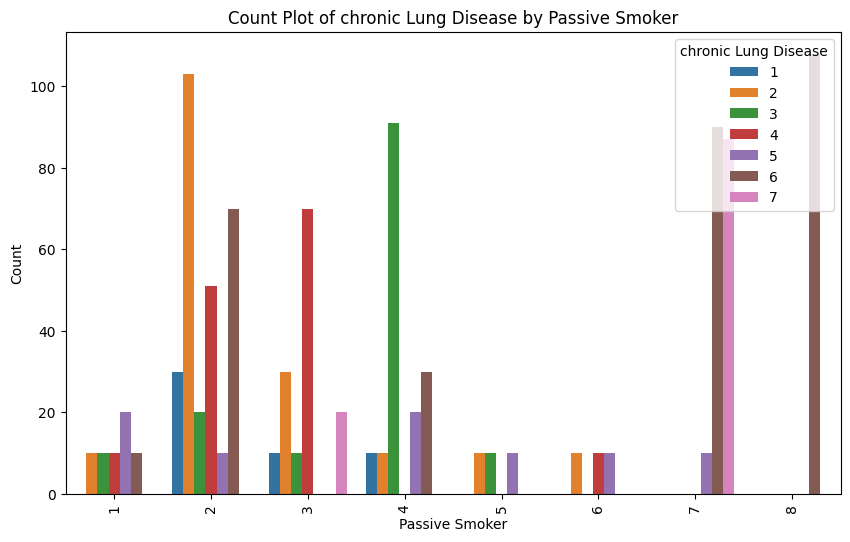

In [ ]:
column = data['Passive Smoker']
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=column, hue='chronic Lung Disease')
plt.xlabel('Passive Smoker')
plt.ylabel('Count')
plt.title(f'Count Plot of chronic Lung Disease by Passive Smoker')
plt.legend(title='chronic Lung Disease', loc='upper right')
plt.xticks(rotation=90)
plt.show()

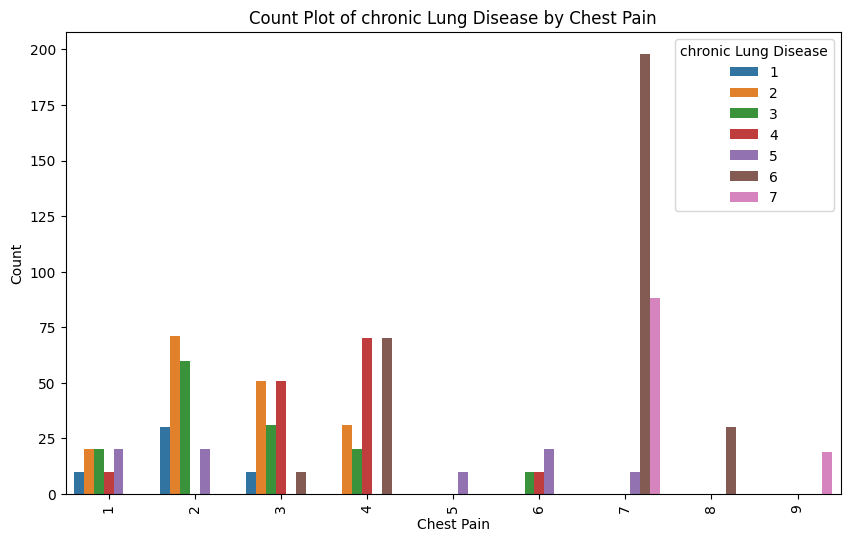

In [ ]:
column = data['Chest Pain']
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=column, hue='chronic Lung Disease')
plt.xlabel('Chest Pain')
plt.ylabel('Count')
plt.title(f'Count Plot of chronic Lung Disease by Chest Pain')
plt.legend(title='chronic Lung Disease', loc='upper right')
plt.xticks(rotation=90)
plt.show()

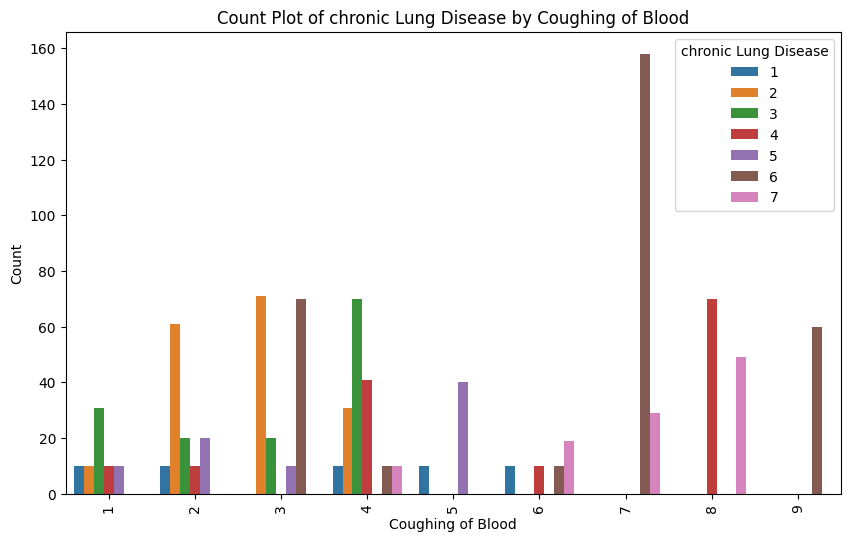

In [ ]:
column = data['Coughing of Blood']
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=column, hue='chronic Lung Disease')
plt.xlabel('Coughing of Blood')
plt.ylabel('Count')
plt.title(f'Count Plot of chronic Lung Disease by Coughing of Blood')
plt.legend(title='chronic Lung Disease', loc='upper right')
plt.xticks(rotation=90)
plt.show()

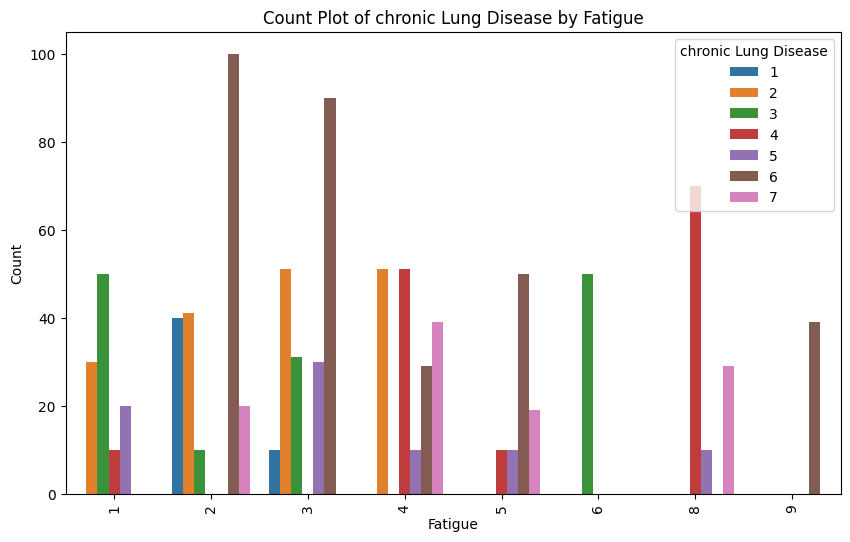

In [ ]:
column = data['Fatigue']
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=column, hue='chronic Lung Disease')
plt.xlabel('Fatigue')
plt.ylabel('Count')
plt.title(f'Count Plot of chronic Lung Disease by Fatigue')
plt.legend(title='chronic Lung Disease', loc='upper right')
plt.xticks(rotation=90)
plt.show()

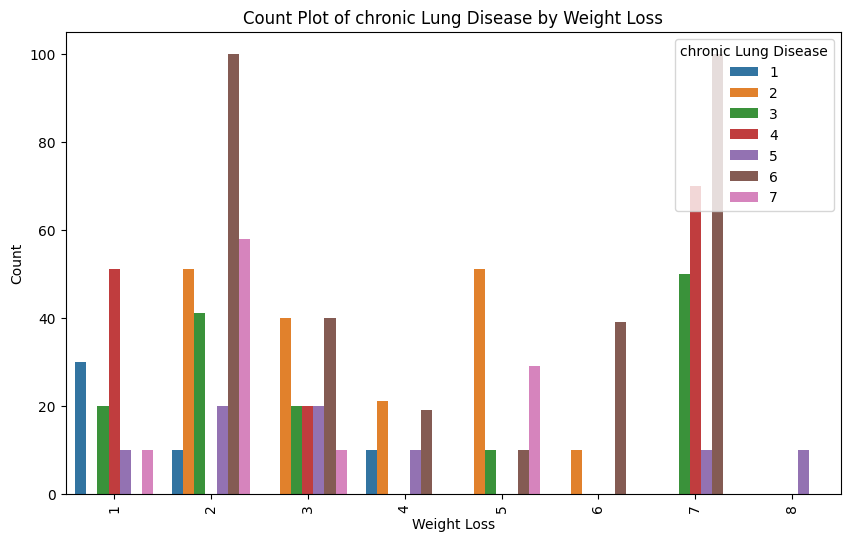

In [ ]:
column = data['Weight Loss']
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=column, hue='chronic Lung Disease')
plt.xlabel('Weight Loss')
plt.ylabel('Count')
plt.title(f'Count Plot of chronic Lung Disease by Weight Loss')
plt.legend(title='chronic Lung Disease', loc='upper right')
plt.xticks(rotation=90)
plt.show()

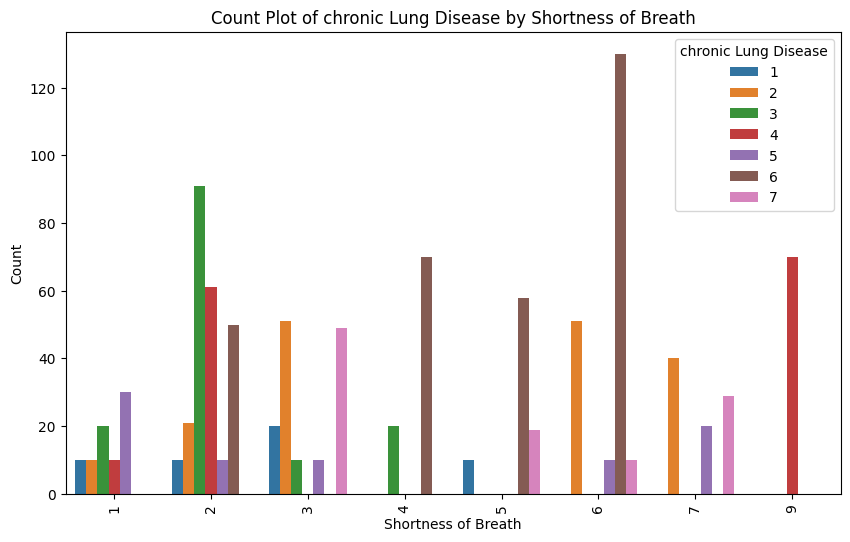

In [ ]:
column = data['Shortness of Breath']
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=column, hue='chronic Lung Disease')
plt.xlabel('Shortness of Breath')
plt.ylabel('Count')
plt.title(f'Count Plot of chronic Lung Disease by Shortness of Breath')
plt.legend(title='chronic Lung Disease', loc='upper right')
plt.xticks(rotation=90)
plt.show()

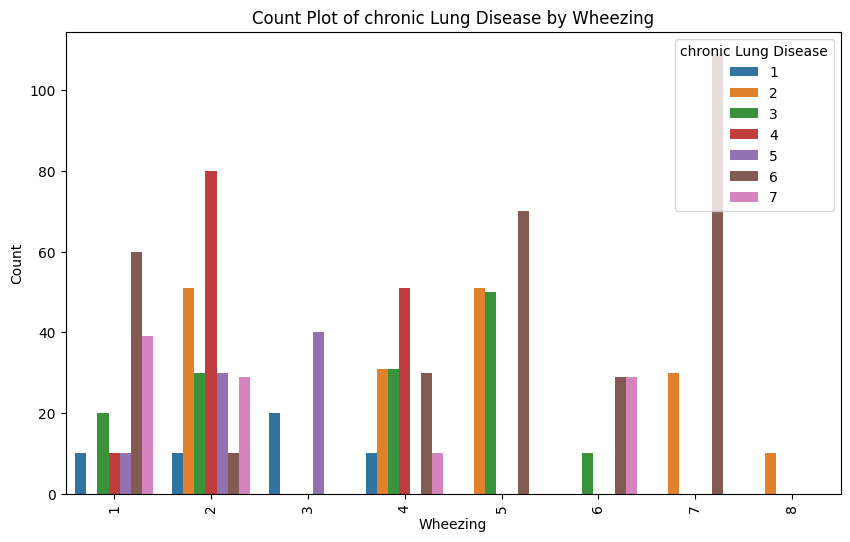

In [ ]:
column = data['Wheezing']
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=column, hue='chronic Lung Disease')
plt.xlabel('Wheezing')
plt.ylabel('Count')
plt.title(f'Count Plot of chronic Lung Disease by Wheezing')
plt.legend(title='chronic Lung Disease', loc='upper right')
plt.xticks(rotation=90)
plt.show()

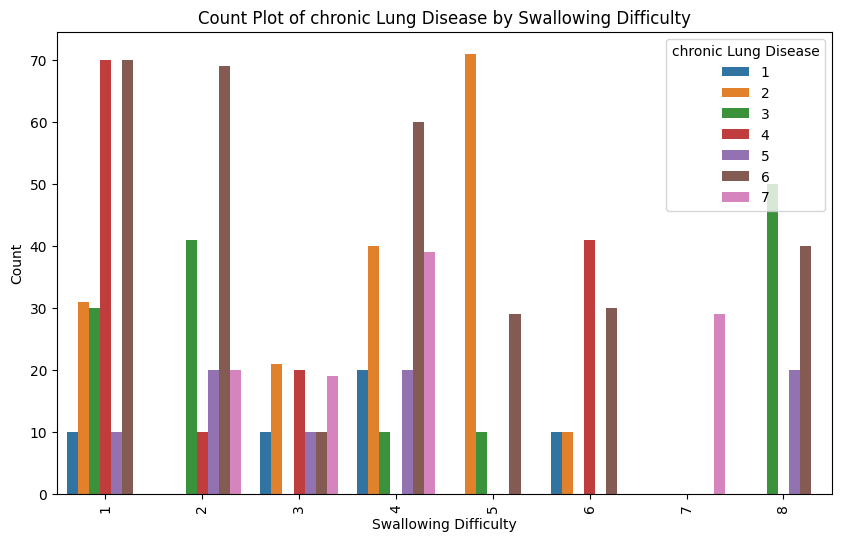

In [ ]:
column = data['Swallowing Difficulty']
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=column, hue='chronic Lung Disease')
plt.xlabel('Swallowing Difficulty')
plt.ylabel('Count')
plt.title(f'Count Plot of chronic Lung Disease by Swallowing Difficulty')
plt.legend(title='chronic Lung Disease', loc='upper right')
plt.xticks(rotation=90)
plt.show()

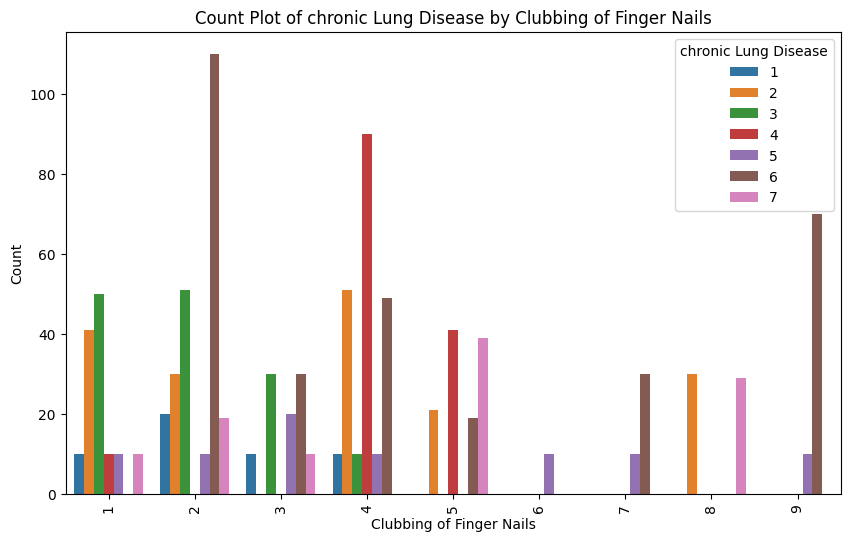

In [ ]:
column = data['Clubbing of Finger Nails']
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=column, hue='chronic Lung Disease')
plt.xlabel('Clubbing of Finger Nails')
plt.ylabel('Count')
plt.title(f'Count Plot of chronic Lung Disease by Clubbing of Finger Nails')
plt.legend(title='chronic Lung Disease', loc='upper right')
plt.xticks(rotation=90)
plt.show()

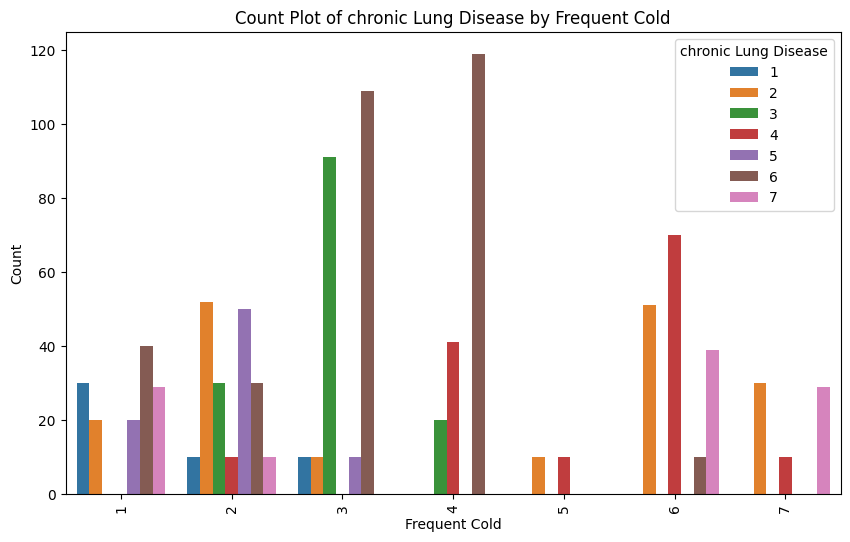

In [ ]:
column = data['Frequent Cold']
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=column, hue='chronic Lung Disease')
plt.xlabel('Frequent Cold')
plt.ylabel('Count')
plt.title(f'Count Plot of chronic Lung Disease by Frequent Cold')
plt.legend(title='chronic Lung Disease', loc='upper right')
plt.xticks(rotation=90)
plt.show()

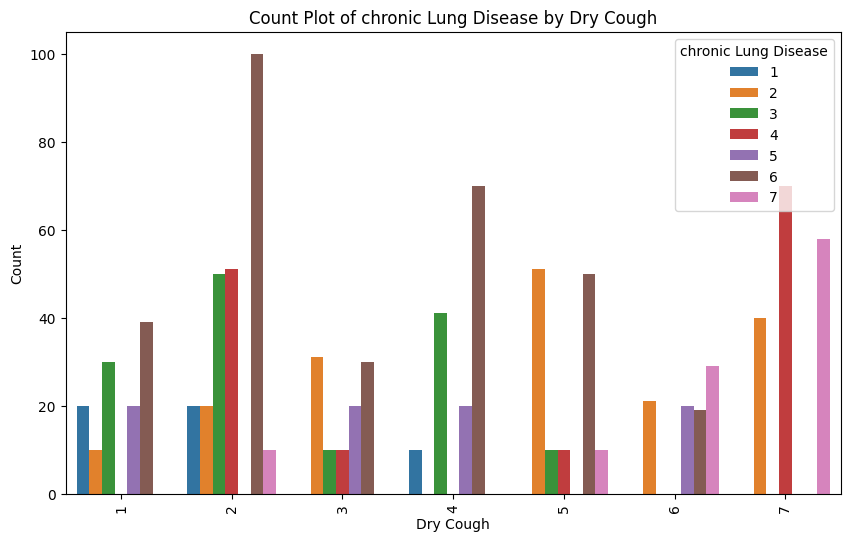

In [ ]:
column = data['Dry Cough']
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=column, hue='chronic Lung Disease')
plt.xlabel('Dry Cough')
plt.ylabel('Count')
plt.title(f'Count Plot of chronic Lung Disease by Dry Cough')
plt.legend(title='chronic Lung Disease', loc='upper right')
plt.xticks(rotation=90)
plt.show()

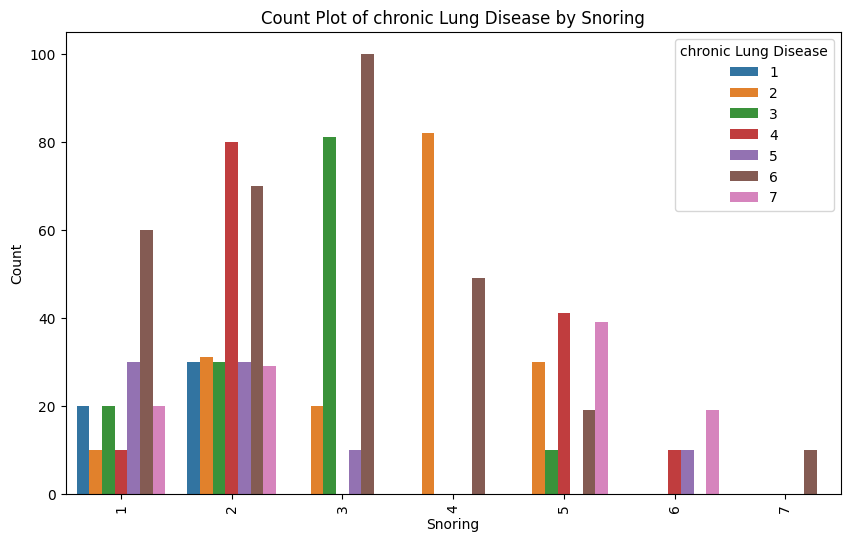

In [ ]:
column = data['Snoring']
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=column, hue='chronic Lung Disease')
plt.xlabel('Snoring')
plt.ylabel('Count')
plt.title(f'Count Plot of chronic Lung Disease by Snoring')
plt.legend(title='chronic Lung Disease', loc='upper right')
plt.xticks(rotation=90)
plt.show()

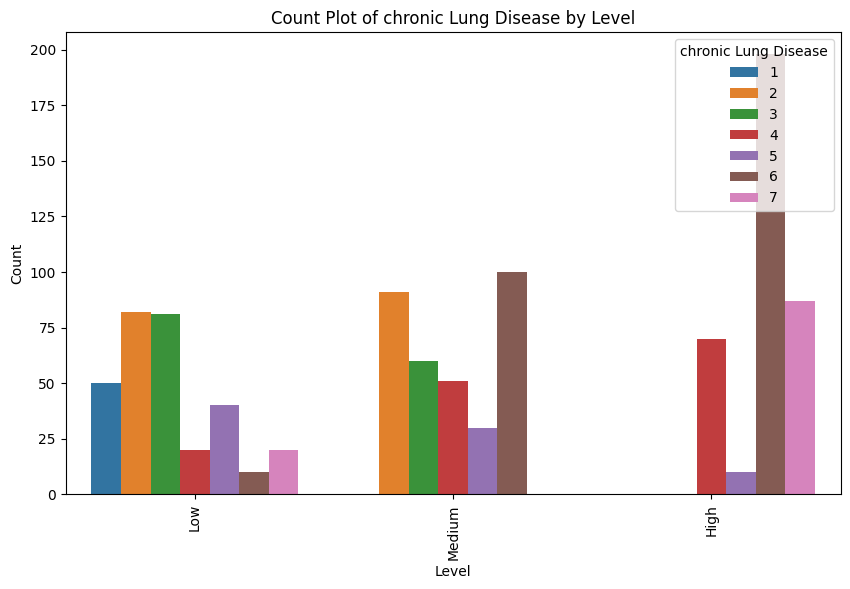

In [ ]:
column = data['Level']
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=column, hue='chronic Lung Disease')
plt.xlabel('Level')
plt.ylabel('Count')
plt.title(f'Count Plot of chronic Lung Disease by Level')
plt.legend(title='chronic Lung Disease', loc='upper right')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Split the dataset into features (X) and target variable (y)

X = data.drop("chronic Lung Disease", axis=1)
y = data["chronic Lung Disease"]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_copy, y, test_size=0.2, random_state=42)


In [ ]:
# Define a function to evaluate models
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=5)
    avg_score = scores.mean()
    return avg_score

# Initialize models
models = [
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    GaussianNB(),
    KNeighborsClassifier(),
    MLPClassifier(max_iter=1000),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    LinearDiscriminantAnalysis()]

In [ ]:
# Lists to store accuracy scores and test scores
accuracy_scores = []
test_scores = []

# Evaluate models and collect scores
for model in models:
    model_name = model.__class__.__name__
    avg_accuracy = evaluate_model(model, X_train, y_train)
    accuracy_scores.append(avg_accuracy)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_scores.append(test_accuracy)

    print(model_name + ":")
    print("Average Accuracy:", avg_accuracy)
    print("Test Accuracy:", test_accuracy)
    print()

LogisticRegression:
Average Accuracy: 0.99375
Test Accuracy: 1.0

DecisionTreeClassifier:
Average Accuracy: 1.0
Test Accuracy: 1.0

RandomForestClassifier:
Average Accuracy: 1.0
Test Accuracy: 1.0

SVC:
Average Accuracy: 0.28875
Test Accuracy: 0.385

GaussianNB:
Average Accuracy: 1.0
Test Accuracy: 1.0

KNeighborsClassifier:
Average Accuracy: 0.35625000000000007
Test Accuracy: 0.365

MLPClassifier:
Average Accuracy: 0.8775000000000001
Test Accuracy: 1.0

GradientBoostingClassifier:
Average Accuracy: 1.0
Test Accuracy: 1.0

AdaBoostClassifier:
Average Accuracy: 0.6325000000000001
Test Accuracy: 0.66

LinearDiscriminantAnalysis:
Average Accuracy: 0.9
Test Accuracy: 0.905



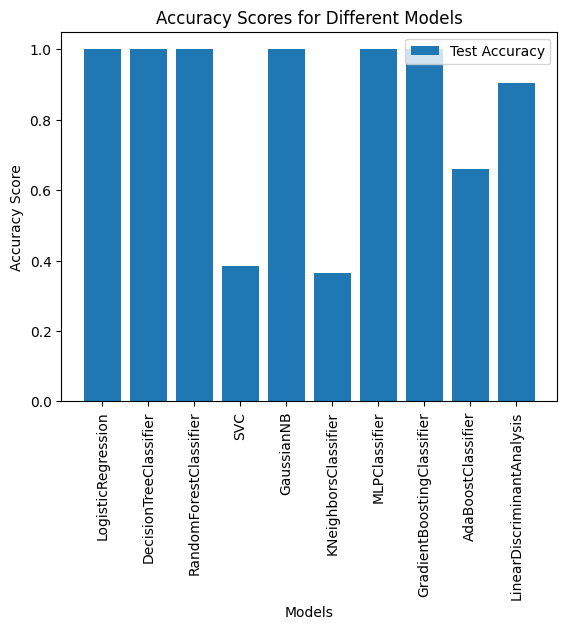

In [33]:
# Plot the accuracy scores and test scores
fig, ax = plt.subplots()
model_names = [model.__class__.__name__ for model in models]

ax.bar(model_names, accuracy_scores, label='Average Accuracy')
ax.bar(model_names, test_scores, label='Test Accuracy')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy Score')
ax.set_title('Accuracy Scores for Different Models')
ax.legend()

plt.xticks(rotation=90)
plt.show()